# Exercises: Means 
By Christopher van Hoecke and Max Margenot

## Lecture Link :
https://www.quantopian.com/lectures/means

### IMPORTANT NOTE: 
This lecture corresponds to the Means lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts

In [1]:
# Quantopian original mode function
def mode(l):
    # Count the number of times each element appears in the list
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # Return the elements that appear the most times
    maxcount = 0
    modes = {}
    for (key, value) in counts.items():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'

In [71]:
## Custom mode function
def mode_function(l):
    counter = defaultdict(int)
    for i in l:
        counter[i] = counter[i]+1

    max_count = max(counter.values())

    if max_count == 1:
        return "No mode"
    else:
        return {k:c for k,c in counter.items() if c==max_count}

In [2]:
# Replacement of quantopian function for YahooFinance function
def get_pricing(ticker, fields='close', start_date='2005-01-01', end_date='2010-01-01'):
    yf = YahooFinancials(ticker)
    ticker_price_info = yf.get_historical_price_data(start_date, end_date, 'daily')
    return pd.DataFrame(ticker_price_info[ticker]['prices'])[fields]

In [3]:
# Useful Libraries
import scipy.stats as stats
import numpy as np
import pandas as pd
from yahoofinancials import YahooFinancials
from matplotlib import pyplot as plt
from collections import defaultdict

#### Data:

In [4]:
l=[]
for x in range(1,100):
    x=np.random.randint(1,100)
    l.append(x)

----

# Exercise 1 : Arithmetic mean.
## a. Mean of random data set.
Find the mean of the randomly generated data set `l`. 

In [5]:
## Your code goes here       
np.mean(l)

51.23232323232323

## b. Mean of returns
Find the mean of the returns of Iteris Inc. (ITI).

In [6]:
# Quantopian code
# price = get_pricing('ITI', fields='price', start_date='2005-01-01', end_date='2010-01-01')

# Replacement code
ITI = YahooFinancials('ITI')
ITI_price_info = ITI.get_historical_price_data('2005-01-01','2020-01-01','daily')
price = pd.DataFrame(ITI_price_info['ITI']['prices'])['close']

returns = price.pct_change()[1:]

## Your code goes here.
returns.mean()

0.0005525846756711331

---

# Exercise 2 : Median
## a. Median of random data set
Find the median of the randomly generated data set `l`.

In [7]:
## Your code goes here   
np.median(l)

49.0

## b. Median of the returns.
Find the median associated with the returns of Bank of America Corp. (BAC).

In [8]:
price = get_pricing('BAC', fields='open', start_date='2005-01-01', end_date='2010-01-01')

returns = price.pct_change()[1:]

np.median(returns)


-0.0005865275925384106

----

# Exercise 3 : Mode
## a. Mode of a random data set. 
Find the mode of the random generated data set `l`.

In [42]:
import statistics

In [72]:
mode_function(l)

{97: 5}

In [73]:
statistics.multimode(l)

[97]

## b. Mode of the returns. 
Find the mode associated with the returns of Goldman Sachs Corp. (GS). *Recall with returns, there may not be any values that appear more than once.*

In [78]:
start = '2014-01-01'
end = '2015-01-01'
pricing = get_pricing('GS', fields='close', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

## Your code goes here

In [81]:
mode_function(returns)

'No mode'

In [84]:
len(statistics.multimode(returns)),returns.shape

(251, (251,))

----

# Exercise 4 : Geometric mean
## a. Geometric Mean of random data set.
Find the Geometric mean of the random generated data set.

$G = (\prod{^n _{i=1}}x_i)^\frac{1}{n}$ 

or

$G = \sqrt[n]{x_1 \cdot x_2 \cdot x_3 \cdot \cdot \cdot x_n}$ 

or 

$ln(G)=\sum{^n _{i=1}}ln(x_i)\cdot\frac{1}{n}$

or

$G=e^{\sum{^n _{i=1}}ln(x_i)\cdot\frac{1}{n}}$

In [86]:
## Your code goes here
statistics.geometric_mean(l)

38.86058029574385

In [98]:
np.exp((np.log(np.array(l)).sum())/len(l))

38.86058029574385

## b. Geometric Mean of returns. 
Find the Geometric Mean of the price of Citi bank (C) for the last 5 years. 

In [99]:
price = get_pricing('C', fields='open', start_date='2005-01-01', end_date='2010-01-01')
## Your code goes here

In [101]:
statistics.geometric_mean(price)

232.57194143762962

In [102]:
np.exp(np.log(price).sum()/len(price))

232.57194143762962

---

# Exercise 5 : Harmonic mean.
## a. Harmonic Mean of random data set. 
Find the harmonic mean of the randomly generated data set `l`.

The reciprocal of the harmonic mean is the arithmetic mean of the reciprocals.

$H = \frac{n}{\sum{^n _{i=1}} \frac{1}{x_i}}$

or 

$\frac{1}{H} = \frac{\sum{^n _{i=1}} \frac{1}{x_i}}{n}$

In [103]:
## Your code goes here 
statistics.harmonic_mean(l)

22.8767342096319

In [104]:
len(l)/np.sum(1/np.array(l))

22.876734209631902

## b. Harmonic Mean of stock returns.
Find the Harmonic Mean of the financial ETF (XLF) over the last 2 years.

In [105]:
price = get_pricing('XLF', fields='open', start_date='2005-01-01', end_date='2010-01-01')

In [106]:
statistics.harmonic_mean(price)

11.901626139146089

# Exercise 6 : Skewness and why it matters.
Skewness in a probability distribution is the measure of asymmetry. Negative skew has fewer low values and a longer left tail, whereas positive skew has fewer high values and a longer right tail.
In asset pricing, skewness is an important information, naimly in risk assessment. Knowledge that the market has a 60% chance of going down and a 40% chance of going up apears helpfull but only if we know the market is obeying a normal distrubtuion. If we are told that the market will go up 2% but down 18%, we can see how skewness would give us better information.

Determine if the returns of SPY from 2010 to 2017 is positivly or negativly skewed. 
*Recall a data set is positivly skewed if the mode is smaller than the median, which is smaller than the mean. A data set is negativly skewed in the event of the reverse (i.e: the mean is greater than the median, which is greater than the mode)*

In [112]:
price = get_pricing('SPY', fields='volume', start_date='2010-01-01', end_date='2017-01-01')
returns = price.pct_change()[1:]

## Your code goes here

We can clearly see positive skewing from the histogram of the returns. We see fewer higher values and a longer right tail.
Plot the histograms of the returns now.

In [126]:
import statsmodels.api as sm

In [128]:
jb, p, sk, kurt = sm.stats.jarque_bera(returns)
jb,p,sk,kurt

(29016980.567522973, 0.0, 19.746357717977183, 630.6159096896845)

In [132]:
returns.mean(), returns.median(), mode_function(returns)

(0.06583036593884936, -0.005784388370806748, 'No mode')

In [138]:
returns.describe()

count    1761.000000
mean        0.065830
std         0.581531
min        -0.942228
25%        -0.185743
50%        -0.005784
75%         0.218422
max        18.930371
Name: volume, dtype: float64

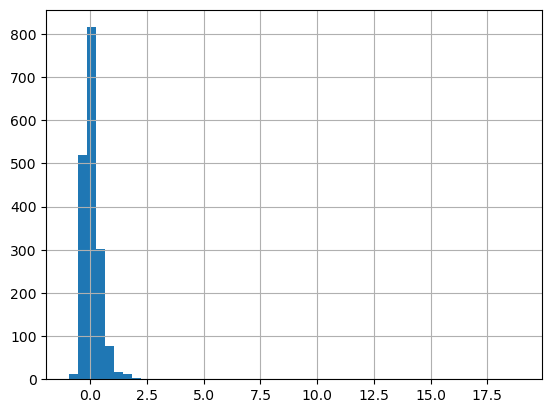

In [136]:
plt.hist(returns, bins=50);
plt.grid()

---

Congratulations on completing the Means exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*